In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
from importlib import reload

import numpy as np
from scipy.stats import circmean, circstd, circvar
import common.constants as gv
reload(gv)

from common.plot_utils import add_vlines
from phase_plane import get_overlap_trials
from common.plot_utils import save_fig
from common.write import replace_global, replace_options
from stats.bootstrap import my_boots_ci


In [35]:
def get_overlaps_mice(mouse, task, trials):
    replace_global("mouse", "'%s'" % mouse)
    reload(gv)

    days = ["first", "last"]
    sample = []
    dist = []

    for day in days:
        overlap_sample = get_overlap_trials(day, "sample", features="sample", task=task, trials=trials)
        overlap_dist = get_overlap_trials(day, "distractor", features="sample", task=task, trials=trials)
    
        sample.append(overlap_sample)
        dist.append(overlap_dist)

    return sample, dist

In [39]:
%%capture
trials = "correct"

sample_mice = []
dist_mice = []

for mouse in gv.mice:

    sample_tasks = []
    dist_tasks = []
    
    for task in ["DPA", "DualGo", "DualNoGo"]:    
        sample, dist = get_overlaps_mice(mouse, task, trials) ;

        sample_tasks.append(sample)
        dist_tasks.append(dist)

    sample_mice.append(sample_tasks)
    dist_mice.append(dist_tasks)
    

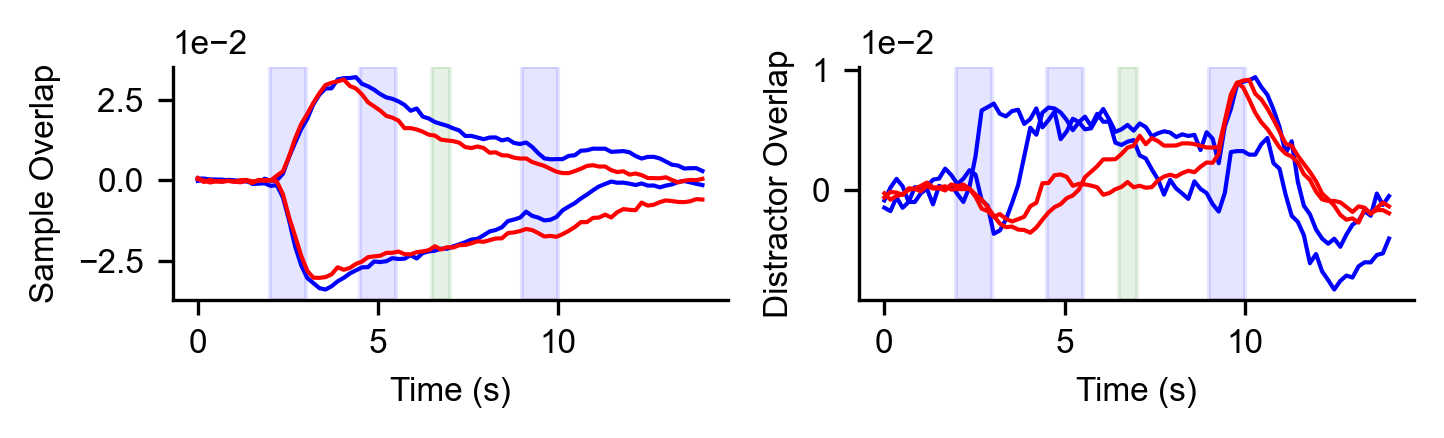

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.plot(gv.time, np.mean(sample[0][0], -1), 'b') ;
ax1.plot(gv.time, np.mean(sample[0][1], -1), 'b') ;

ax1.plot(gv.time, np.mean(sample[1][0], -1), 'r') ;
ax1.plot(gv.time, np.mean(sample[1][1], -1), 'r') ;

ax1.set_ylabel('Sample Overlap')
ax1.set_xlabel('Time (s)')
add_vlines(ax1)
# ax1.set_xlim([0,12])

ax2.plot(gv.time, np.mean(dist[0][0], -1), 'b') ;
ax2.plot(gv.time, np.mean(dist[0][1], -1), 'b') ;

ax2.plot(gv.time, np.mean(dist[1][0], -1), 'r') ;
ax2.plot(gv.time, np.mean(dist[1][1], -1), 'r') ;

# ax2.plot(gv.time, np.mean(dist[0][0], -1) - np.mean(dist[0][1], -1), 'b') ;
# ax2.plot(gv.time, np.mean(dist[1][0], -1) - np.mean(dist[1][1], -1), 'r') ;

# ax2.set_ylabel('Choice Overlap')
ax2.set_ylabel('Distractor Overlap')
ax2.set_xlabel('Time (s)')
add_vlines(ax2)
# ax2.set_xlim([0,12])

fig.set_size_inches(2.427 * 2, 1.5)
fig.tight_layout()